In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import os

def read_dataset(path, sep=';', encoding='utf-8-sig', low_memory=False):
    return pd.read_csv(path, sep=sep, encoding=encoding, low_memory=low_memory)

def plot_tsne_distribution(csv_path, save_name, target_col='Таргет', save_dir='tsne', random_state=42):
    df = read_dataset(csv_path)
    
    X = df.drop(columns=[target_col])
    y = df[target_col]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    tsne = TSNE(n_components=2, random_state=random_state, perplexity=30)
    X_tsne = tsne.fit_transform(X_scaled)

    plt.figure(figsize=(10, 8))

    classes = np.unique(y)
    
    for cls in classes:
        idx = y == cls
        plt.scatter(X_tsne[idx, 0], X_tsne[idx, 1], label=f'Класс {cls}', alpha=0.7, edgecolor='k', s=50)
    
    plt.title('Визуализация распределения классов с помощью t-SNE')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.legend(title='Класс')
    plt.grid(True, linestyle='--', alpha=0.5)

    os.makedirs(save_dir, exist_ok=True)
    save_path = os.path.join(save_dir, save_name)
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"График сохранён по пути: {save_path}")

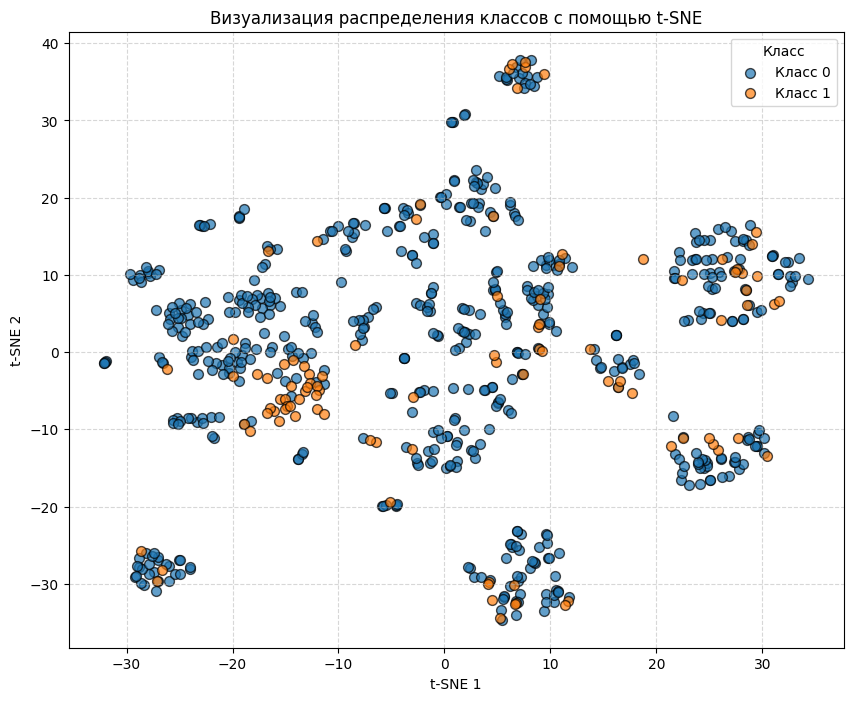

График сохранён по пути: tsne\tsne_distribution_s_magistr.png


In [5]:
plot_tsne_distribution('../../data/datasets/subjects_magistr.csv', 'tsne_distribution_s_magistr.png')

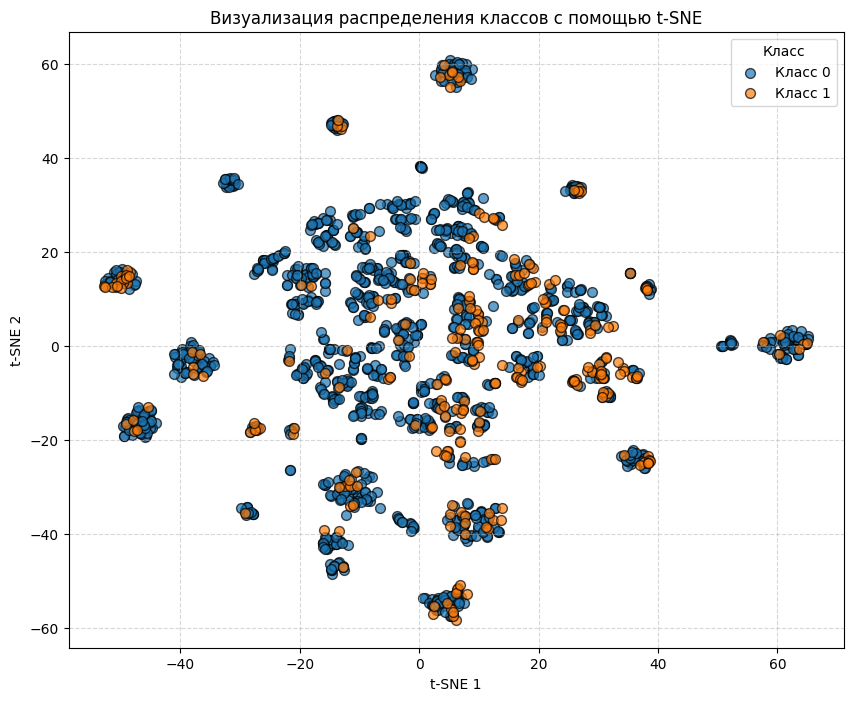

График сохранён по пути: tsne\tsne_distribution_s_bak_spec.png


In [6]:
plot_tsne_distribution('../../data/datasets/subjects_bak_spec.csv', 'tsne_distribution_s_bak_spec.png')

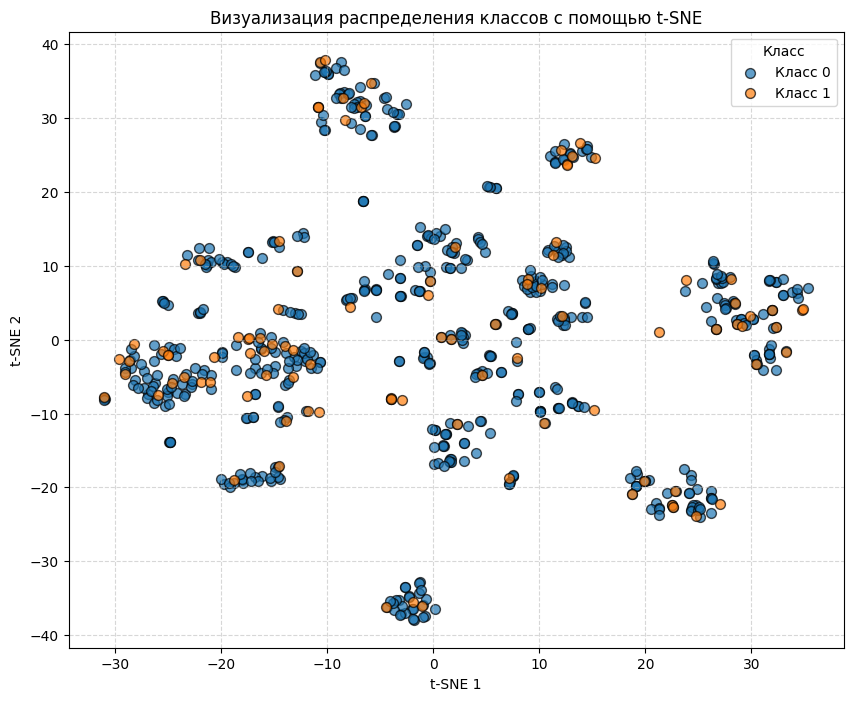

График сохранён по пути: tsne\tsne_distribution_c1_magistr.png


In [7]:
plot_tsne_distribution('../../data/datasets/1st_course_magistr.csv', 'tsne_distribution_c1_magistr.png')

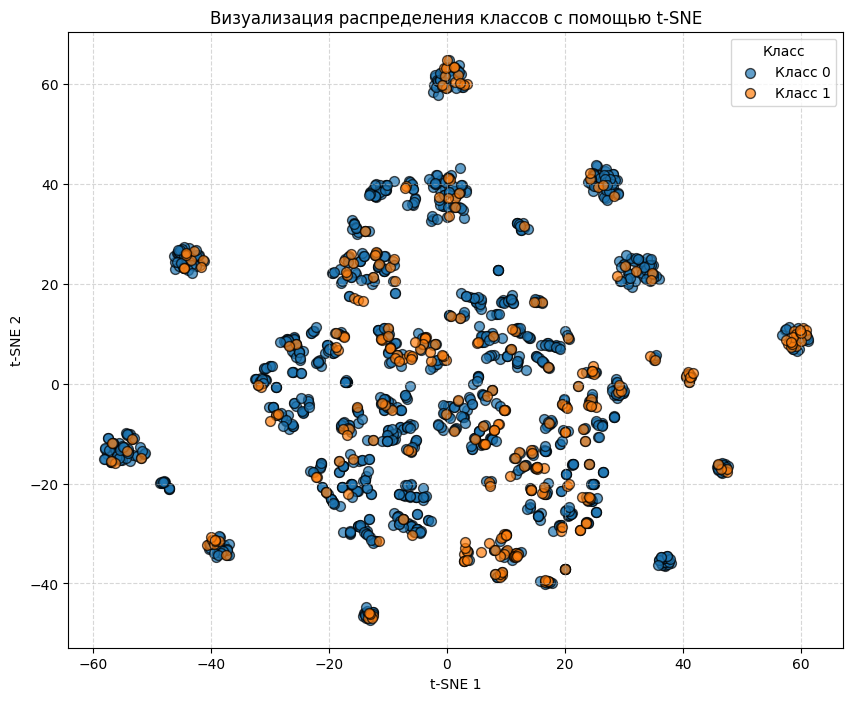

График сохранён по пути: tsne\tsne_distribution_c1_bak_spec.png


In [8]:
plot_tsne_distribution('../../data/datasets/1st_course_bak_spec.csv', 'tsne_distribution_c1_bak_spec.png')